# Kmeans Clustering for IRIS dataset

In [1]:
# Adding Preliminary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing Dataset

from sklearn import datasets
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names
iris_data['Type']=iris.target
iris_data


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
#Preparing Data

iris_X = iris_data.iloc[:, [0, 1, 2,3]].values

In [4]:
'''Now we will separate the target variable from the 
original dataset and again convert it to an array by using numpy.'''

iris_Y = iris_data['Type']
iris_Y = np.array(iris_Y)

# IRIS dataset clustering plot

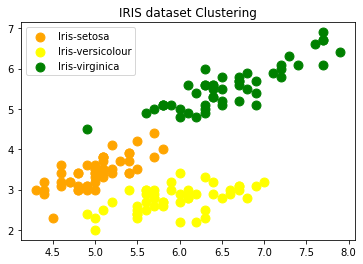

In [5]:
# Visualise Classes
'''In this IRIS dataset, we have three classes.
We visualise these classes in a 2-D graph.'''

plt.scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1], s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1], s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_X[iris_Y == 2, 0], iris_X[iris_Y == 2, 2], s = 80, c = 'green', label = 'Iris-virginica')
plt.title('IRIS dataset Clustering')
plt.legend()

In [6]:
'''Kmeans is a kind of Unsupervised type of Clustering . 
It basically takes input from Dataset and predicts the clusters 
accordingly'''

#Import Libraries for Kmeans

from sklearn.cluster import KMeans

In [7]:
'''Implicit objective function in k-Means measures 
sum of distances of observations from their cluster centroids,
called Within-Cluster-Sum-of-Squares (WCSS)'''
# Assigning the WCSS
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(iris_X)
    wcss.append(kmeans.inertia_)

# Elbow plot (Kmeans)

Text(0, 0.5, 'WCSS')

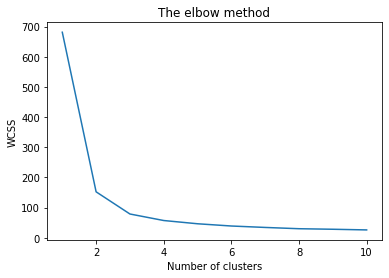

In [8]:
# Plot the Elbow method
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [9]:
# Modelling K-Means

cluster_Kmeans = KMeans(n_clusters=3)
model_kmeans = cluster_Kmeans.fit(iris_X)
pred_kmeans = model_kmeans.labels_
pred_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

# Kmeans Clustering plot for IRIS dataset

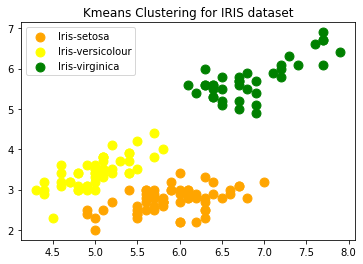

In [10]:
# Plotting the Kmeans Clustering

plt.scatter(iris_X[pred_kmeans == 0, 0], iris_X[pred_kmeans == 0, 1], s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_X[pred_kmeans == 1, 0], iris_X[pred_kmeans == 1, 1], s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_X[pred_kmeans == 2, 0], iris_X[pred_kmeans == 2, 2], s = 80, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
#plt.scatter(cluster_Kmeans.cluster_centers_[:, 0], cluster_Kmeans.cluster_centers_[:,1], s = 80, c = 'red', label = 'Centroids')
plt.title('Kmeans Clustering for IRIS dataset')
plt.legend()

# Kmeans Accuracy using KNN classifier for IRIS dataset

In [11]:
'''KNN classifier which is a type of supervised Machine
Learning Technique.This is used to detect the accuracy 
and classification  of the given dataset'''

# Importing Libraries for Modelling.
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [12]:
# Assigning values of X and y from dataset

X, y = iris.data[:, :], iris.target  

#Setting training and testing values

Xtrain, Xtest, y_train, y_test = train_test_split(X, y)
scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

# Modeling is done using KNN classifiers.
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(Xtrain, y_train)
y_pred = knn.predict(Xtest)


# Display the Output

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))


Accuracy Score: 0.9473684210526315
Confusion matrix 
 [[10  0  0]
 [ 0 16  1]
 [ 0  1 10]]
Classification 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.94      0.94      0.94        17
           2       0.91      0.91      0.91        11

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



# Accuracy for Kmeans (Classification)

In [13]:
X, y = iris.data[:, :], iris.target

Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [14]:
#Support Vector Machine
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Support Vector Machine:")
print("Accuracy = ", accuracy)
print(cm)

Support Vector Machine:
Accuracy =  0.9333333333333333
[[16  0  0]
 [ 0 22  1]
 [ 0  3 18]]


In [15]:
#Decision Tree Classifier
from sklearn.model_selection import train_test_split
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

classifier = DT(criterion='entropy', random_state=0)
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
print("Decision Tree Classifier :")
print("Accuracy = ", accuracy)
print(cm)

Decision Tree Classifier :
Accuracy =  0.9333333333333333
[[21  0  0]
 [ 0 29  1]
 [ 0  2 22]]


In [16]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier as RF
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
classifier = RF(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
print("Random Forest Classifier :")
print("Accuracy = ", accuracy)
print(cm)

Random Forest Classifier :
Accuracy =  0.9333333333333333
[[16  0  0]
 [ 0 23  0]
 [ 0  3 18]]


## Spherical clustering

In [17]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import SpectralClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score 

In [18]:
X, y = iris.data[:, :], iris.target

Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                  random_state=0)

In [19]:
# Preprocessing the data to make it visualizable 

# Scaling the Data 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 

# Normalizing the Data 
X_normalized = normalize(X_scaled) 

# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

X_principal.head() 


,P1,P2
0,1.124850,-0.255485
1,1.078072,0.252676
2,1.125217,0.096343
3,1.098276,0.205739
4,1.113625,-0.307216


In [20]:
# Building the clustering model 
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf') 

# Training the model and Storing the predicted cluster labels 
labels_rbf = spectral_model_rbf.fit_predict(X_principal) 


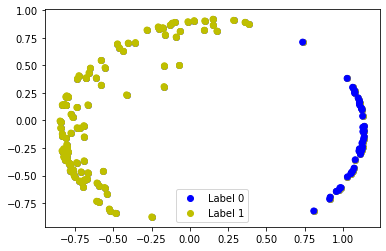

In [22]:
# Building the label to colour mapping 
colours = {} 
colours[0] = 'b'
colours[1] = 'y'

# Building the colour vector for each data point 
cvec = [colours[label] for label in labels_rbf] 

# Plotting the clustered scatter plot 

b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b'); 
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y'); 

# plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((b, y), ('Label 0', 'Label 1')) 
plt.show() 


In [23]:
# Building the clustering model 
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors') 

# Training the model and Storing the predicted cluster labels 
labels_nn = spectral_model_nn.fit_predict(X_principal) 


In [24]:
# List of different values of affinity 
affinity = ['rbf', 'nearest-neighbours'] 

# List of Silhouette Scores 
s_scores = [] 

# Evaluating the performance 
s_scores.append(silhouette_score(X, labels_rbf)) 
s_scores.append(silhouette_score(X, labels_nn)) 

print(s_scores) 


[0.6867350732769776, 0.6867350732769776]


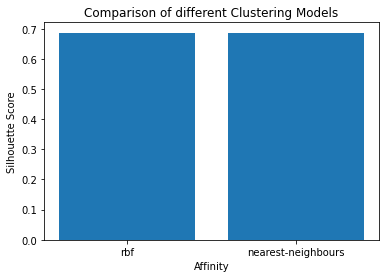

In [25]:
# Plotting a Bar Graph to compare the models 
plt.bar(affinity, s_scores) 
plt.xlabel('Affinity') 
plt.ylabel('Silhouette Score') 
plt.title('Comparison of different Clustering Models') 
plt.show() 


## t-SNE

In [26]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [28]:
sns.set()
sns.set(rc={"figure.figsize": (10, 8)})
PALETTE = sns.color_palette('deep', n_colors=3)
CMAP = ListedColormap(PALETTE.as_hex())
RANDOM_STATE = 42


In [29]:
dataset = load_iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'

In [30]:
iris = pd.DataFrame(
    dataset.data,
    columns=features)
iris[target] = dataset.target


## Defining plotting functions¶


In [31]:
def plot_iris_2d(x, y, title, xlabel="1st eigenvector", ylabel="2nd eigenvector"):
    sns.set_style("darkgrid")
    
    plt.scatter(x, y,
        c=iris['species'],
        cmap=CMAP,
        s=70)
    
    plt.title(title, fontsize=20, y=1.03)

    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

In [32]:
def plot_iris_3d(x, y, z, title):
    sns.set_style('whitegrid')
    
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)
    
    ax.scatter(x, y, z,
               c=iris['species'],
               cmap=CMAP,
               s=40)
    
    ax.set_title(title, fontsize=20, y=1.03)
    
    fsize = 14
    ax.set_xlabel("1st eigenvector", fontsize=fsize)
    ax.set_ylabel("2nd eigenvector", fontsize=fsize)
    ax.set_zlabel("3rd eigenvector", fontsize=fsize)
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

### ploting t-SNE

In [33]:
tsne = TSNE(n_components=2, n_iter=1000, random_state=RANDOM_STATE)
points = tsne.fit_transform(iris[features])

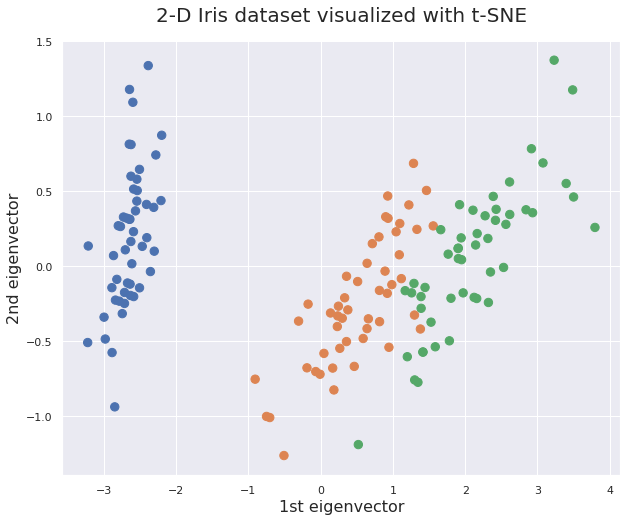

In [37]:
plot_iris_2d(
    x = points[:, 0],
    y = points[:, 1],
    title = '2-D Iris dataset visualized with t-SNE')

In [38]:
tsne = TSNE(n_components=3, n_iter=5000, random_state=RANDOM_STATE)
points = tsne.fit_transform(iris[features])

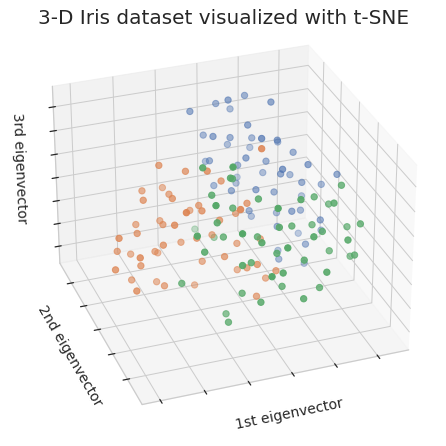

In [40]:
plot_iris_3d(
    x = points[:,0],
    y = points[:,1],
    z = points[:,2],
    title = "3-D Iris dataset visualized with t-SNE")